In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('rainfaLLIndia.csv')
df

,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9
...,...,...,...,...,...,...,...
4327,LAKSHDWEEP,2017,521.9,164.2,206.2,216.0,1108.3
4328,LAKSHDWEEP,2018,203.2,139.7,124.4,74.4,541.7
4329,LAKSHDWEEP,2019,242.5,489.4,338.4,156.7,1227.0
4330,LAKSHDWEEP,2020,265.4,476.2,269.6,334.3,1345.5


In [3]:
df['subdivision'].unique().shape

(36,)

In [4]:
a=df.groupby('subdivision')
for subdivision, subdivision_df in a:
    if subdivision=='ANDAMAN & NICOBAR ISLAND':
        andaman = subdivision_df
    elif subdivision == 'ARUNACHAL PRADESH':
        arunachal = subdivision_df

In [5]:
andaman


,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9
...,...,...,...,...,...,...,...
111,ANDAMAN & NICOBAR ISLAND,2017,349.1,389.4,414.8,372.8,1526.1
112,ANDAMAN & NICOBAR ISLAND,2018,518.5,239.2,415.7,395.9,1569.2
113,ANDAMAN & NICOBAR ISLAND,2019,662.2,212.0,860.4,596.8,2331.5
114,ANDAMAN & NICOBAR ISLAND,2020,498.3,362.9,370.0,481.3,1712.5


In [6]:
import seaborn as sns

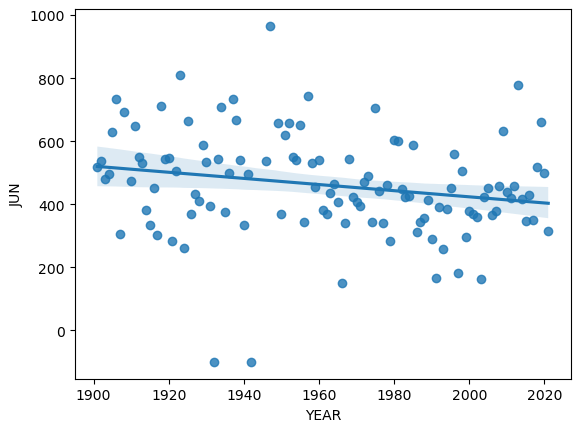

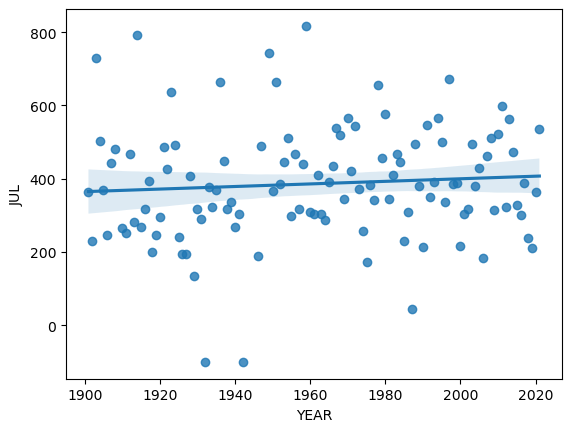

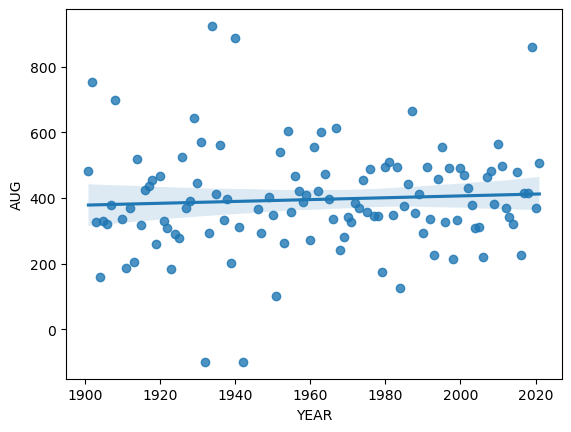

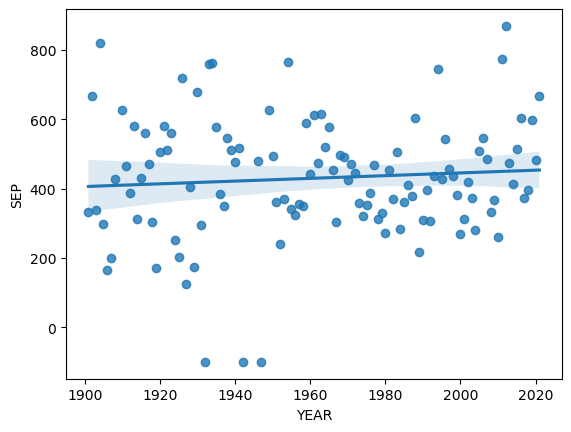

In [7]:
import matplotlib.pyplot as plt
f1=['JUN','JUL','AUG','SEP']
for i,cols in enumerate(f1):
    plt.figure(i)
    sns.regplot(x=andaman['YEAR'],y=andaman[cols])


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
f=['JUN','JUL','AUG','SEP']
sum=0
for i in f:
    reg = LinearRegression().fit(andaman[['YEAR']], andaman[i])
    print(reg.predict([[2022]]))


[402.23619902]
[407.68951419]
[412.63273394]
[453.69583656]


Using the above approach, we will use linear regression for all the subdivisions

In [15]:
submission = pd.DataFrame(columns=["subdivision", "YEAR", "JUN-SEP"])
sub = df['subdivision'].unique()
a=df.groupby('subdivision')
for z in sub:
    for subdivision, subdivision_df in a:
        if subdivision == z:
            new = subdivision_df
            f=['JUN','JUL','AUG','SEP']
            sum=0
            for i in f:
                X = new[['YEAR']]
                y = new[i]
                reg = LinearRegression().fit(X, y)
                sum+=reg.predict([[2022]])
    new_row = pd.DataFrame({
    "subdivision": [z],
    "YEAR": [2022],
    "JUN-SEP": [sum]
    })

    submission = pd.concat([submission, new_row], ignore_index=True)
            
   

In [16]:
submission

,subdivision,YEAR,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,2022,[1676.2542837083706]
1,ARUNACHAL PRADESH,2022,[1281.108168310012]
2,ASSAM & MEGHALAYA,2022,[1654.6480578512399]
3,"NAGALAND, MANIPUR, MIZORAM, TRIPURA",2022,[1375.5129338842976]
4,SUB HIMALAYAN W.BENGAL & SIKKIM,2022,[1965.036074380165]
5,GANGETIC W.BENGAL,2022,[1202.2970247933881]
6,ORISSA,2022,[1131.260950413223]
7,JHARKHAND,2022,[991.4753305785124]
8,BIHAR,2022,[946.8805785123966]
9,EAST UTTAR PRADESH,2022,[782.1909504132233]
